# **Pré-processamento**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Importando base da web**

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1V5iOafpDuFMfQXFFomDSV_cTK0VRLzxd"

In [ ]:
df = pd.read_csv(url)

**Visualizando os registros do rótulo**

In [ ]:
df.result.value_counts()

1    22654
2     7508
Name: result, dtype: int64

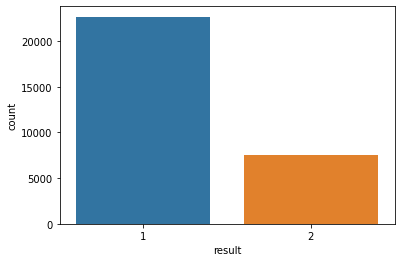

In [ ]:

afterGraph = sns.countplot(x="result", data=df)

**Separando dados da base**

In [ ]:
X = df.drop("result", axis = 1)
y = df.result

**Instanciando NearMiss e balanceando base**

In [ ]:
nr = NearMiss()

In [ ]:
X, y = nr.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


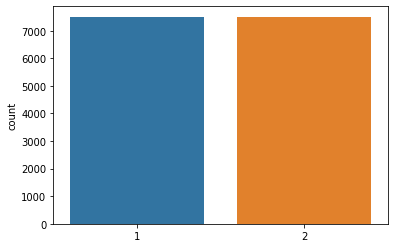

In [ ]:
beforeGraph = sns.countplot(x=y)

# **Instânciando classificadores e validação cruzada**

**Classificadores**

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(30,30,30)) #solver='lbfgs'


**Validação cruzada**

In [ ]:
rf_Pred = cross_val_predict(rf, X, y, cv = 10)

In [ ]:
dt_Pred = cross_val_predict(dt, X, y, cv = 10)

In [ ]:
nn_Pred = cross_val_predict(nn, X, y, cv = 10)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Separando treino e teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

# **Trabalhando com os dados**

# Random forest sem validação

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_simple_pred = rf.predict(X_test)

**Relatório de Classificação**

In [ ]:
relatorioRF = classification_report(y_test, rf_simple_pred)

**Matriz de confusão e taxas**

In [ ]:
rfMatrix = confusion_matrix(y_test, rf_simple_pred)

In [ ]:
rfVn = rfMatrix[0,0]
rfFn = rfMatrix[1,0]
rfFp = rfMatrix[0,1]
rfVp = rfMatrix[1,1]

In [ ]:
acuraciaRf = (rfVp + rfVn) / (rfVp + rfVn + rfFp + rfFn)*100
sensibilidadeRf = rfVp / (rfVn + rfFn) * 100
especificidadeRf = rfVn / (rfVn + rfFp) * 100
t_erroRf = (rfFp + rfFn) / (rfVp + rfVn + rfFp + rfFn) * 100

# Random forest com validação

In [ ]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Relatório de Classificação**

In [ ]:
relatorioRF_vld = classification_report(y, rf_Pred)

**Matriz de confusão e taxas**

In [ ]:
rfMatrix_vld = confusion_matrix(y, rf_Pred)

In [ ]:
rfVn_vld = rfMatrix_vld[0,0]
rfFn_vld = rfMatrix_vld[1,0]
rfFp_vld = rfMatrix_vld[0,1]
rfVp_vld = rfMatrix_vld[1,1]

In [ ]:
acuraciaRf_vld = (rfVp_vld + rfVn_vld) / (rfVp_vld + rfVn_vld + rfFp_vld + rfFn_vld)*100
sensibilidadeRf_vld = rfVp_vld / (rfVn_vld + rfFn_vld) * 100
especificidadeRf_vld = rfVn_vld / (rfVn_vld + rfFp_vld) * 100
t_erroRf_vld = (rfFp_vld + rfFn_vld) / (rfVp_vld + rfVn_vld + rfFp_vld + rfFn_vld) * 100

# Decision tree sem validação

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_simple_pred = dt.predict(X_test)

**Relatório de Classificação**

In [ ]:
relatorioDT = classification_report(y_test, dt_simple_pred)

**Matriz de confusão e taxas**

In [ ]:
dtMatrix = confusion_matrix(y_test, dt_simple_pred)

In [ ]:
dtVn = dtMatrix[0,0]
dtFn = dtMatrix[1,0]
dtFp = dtMatrix[0,1]
dtVp = dtMatrix[1,1]

In [ ]:
acuraciaDt = (dtVp + dtVn) / (dtVp + dtVn + dtFp + dtFn)*100
sensibilidadeDt = dtVp / (dtVn + dtFn) * 100
especificidadeDt = dtVn / (dtVn + dtFp) * 100
t_erroDt = (dtFp + dtFn) / (dtVp + dtVn + dtFp + dtFn) * 100

# Decision tree com validação

In [ ]:
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Relatório de Classificação**

In [ ]:
relatorioDT_vld = classification_report(y, dt_Pred)

**Matriz de confusão e taxas**

In [ ]:
dtMatrix_vld = confusion_matrix(y, dt_Pred)

In [ ]:
dtVn_vld = dtMatrix_vld[0,0]
dtFn_vld = dtMatrix_vld[1,0]
dtFp_vld = dtMatrix_vld[0,1]
dtVp_vld = dtMatrix_vld[1,1]

In [ ]:
acuraciaDt_vld = (dtVp_vld + dtVn_vld) / (dtVp_vld + dtVn_vld + dtFp_vld + dtFn_vld)*100
sensibilidadeDt_vld = dtVp_vld / (dtVn_vld + dtFn_vld) * 100
especificidadeDt_vld = dtVn_vld / (dtVn_vld + dtFp_vld) * 100
t_erroDt_vld = (dtFp_vld + dtFn_vld)/ (dtVp_vld + dtVn_vld + dtFp_vld + dtFn_vld) * 100

# Neural Network sem validação

In [ ]:
nn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
nn_simple_pred = nn.predict(X_test)

**Relatório de Classificação**

In [ ]:
relatorioNN = classification_report(y_test, nn_simple_pred)

**Matriz de confusão e taxas**

In [ ]:
nnMatrix = confusion_matrix(y_test, nn_simple_pred)

In [ ]:
nnVn = nnMatrix[0,0]
nnFn = nnMatrix[1,0]
nnFp = nnMatrix[0,1]
nnVp = nnMatrix[1,1]

In [ ]:
acuraciaNn = (nnVp + nnVn) / (nnVp + nnVn + nnFp + nnFn)*100
sensibilidadeNn = nnVp / (nnVn + nnFn) * 100
especificidadeNn = nnVn / (nnVn + nnFp) * 100
t_erroNn = (nnFp + nnFn) / (nnVp + nnVn + nnFp + nnFn) * 100

# Neural Network com validação

In [ ]:
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Relatório de Classificação**

In [ ]:
relatorioNN_vld = classification_report(y, nn_Pred)

**Matriz de confusão e taxas**

In [ ]:
nnMatrix_vld = confusion_matrix(y, nn_Pred)

In [ ]:
nnVn_vld = nnMatrix_vld[0,0]
nnFn_vld = nnMatrix_vld[1,0]
nnFp_vld = nnMatrix_vld[0,1]
nnVp_vld = nnMatrix_vld[1,1]

In [ ]:
acuraciaNn_vld = (nnVp_vld + nnVn_vld) / (nnVp_vld + nnVn_vld + nnFp_vld + nnFn_vld)*100
sensibilidadeNn_vld = nnVp_vld / (nnVn_vld + nnFn_vld) * 100
especificidadeNn_vld = nnVn_vld / (nnVn_vld + nnFp_vld) * 100
t_erroNn_vld = (nnFp_vld + nnFn_vld) / (nnVn_vld + nnFp_vld + nnFp_vld + nnFn_vld) * 100

# **Resultados**

**Random forest**

In [ ]:
print("Random Forest \n")
print("Relatório sem validação cruzada \n")
print(relatorioRF)
print("\n Relatório com validação cruzada \n")
print(relatorioRF_vld)

Random Forest 

Relatório sem validação cruzada 

              precision    recall  f1-score   support

           1       0.84      0.82      0.83      1877
           2       0.82      0.85      0.84      1877

    accuracy                           0.83      3754
   macro avg       0.83      0.83      0.83      3754
weighted avg       0.83      0.83      0.83      3754


 Relatório com validação cruzada 

              precision    recall  f1-score   support

           1       0.68      0.84      0.75      7508
           2       0.79      0.61      0.69      7508

    accuracy                           0.73     15016
   macro avg       0.74      0.73      0.72     15016
weighted avg       0.74      0.73      0.72     15016



In [ ]:
print("Random Forest \n")
print("Taxas da Matrix da Confusão sem validação cruzada")
print("Acurácia: ", int(acuraciaRf), "%")
print("Sensibilidade: ", int(sensibilidadeRf), "%")
print("Especificidade: ", int(especificidadeRf), "%")
print("Taxa de Erro: ", int(t_erroRf), "%")
print("\n")
print("Taxas da Matrix da Confusão com validação cruzada:")
print("Acurácia: ", int(acuraciaRf_vld), "%")
print("Sensibilidade: ", int(sensibilidadeRf_vld), "%")
print("Especificidade: ", int(especificidadeRf_vld), "%")
print("Taxa de Erro: ", int(t_erroRf_vld), "%")

Random Forest 

Taxas da Matrix da Confusão sem validação cruzada
Acurácia:  83 %
Sensibilidade:  87 %
Especificidade:  81 %
Taxa de Erro:  16 %


Taxas da Matrix da Confusão com validação cruzada:
Acurácia:  72 %
Sensibilidade:  49 %
Especificidade:  84 %
Taxa de Erro:  27 %


**Decision tree**

In [ ]:
print("Decision tree \n")
print("Relatório sem validação cruzada \n")
print(relatorioDT)
print("\n Relatório com validação cruzada \n")
print(relatorioDT_vld)

Decision tree 

Relatório sem validação cruzada 

              precision    recall  f1-score   support

           1       0.78      0.78      0.78      1877
           2       0.78      0.78      0.78      1877

    accuracy                           0.78      3754
   macro avg       0.78      0.78      0.78      3754
weighted avg       0.78      0.78      0.78      3754


 Relatório com validação cruzada 

              precision    recall  f1-score   support

           1       0.65      0.79      0.71      7508
           2       0.73      0.57      0.64      7508

    accuracy                           0.68     15016
   macro avg       0.69      0.68      0.68     15016
weighted avg       0.69      0.68      0.68     15016



In [ ]:
print("Decision tree \n")
print("Taxas da Matrix da Confusão sem validação cruzada")
print("Acurácia: ", int(acuraciaDt), "%")
print("Sensibilidade: ", int(sensibilidadeDt), "%")
print("Especificidade: ", int(especificidadeDt), "%")
print("Taxa de Erro: ", int(t_erroDt), "%")
print("\n")
print("Taxas da Matrix da Confusão com validação cruzada:")
print("Acurácia: ", int(acuraciaDt_vld), "%")
print("Sensibilidade: ", int(sensibilidadeDt_vld), "%")
print("Especificidade: ", int(especificidadeDt_vld), "%")
print("Taxa de Erro: ", int(t_erroDt_vld), "%")

Decision tree 

Taxas da Matrix da Confusão sem validação cruzada
Acurácia:  78 %
Sensibilidade:  78 %
Especificidade:  78 %
Taxa de Erro:  21 %


Taxas da Matrix da Confusão com validação cruzada:
Acurácia:  67 %
Sensibilidade:  46 %
Especificidade:  79 %
Taxa de Erro:  32 %


**Neural Network**

In [ ]:
print("Neural Network \n")
print("Relatório sem validação cruzada \n")
print(relatorioNN)
print("\n Relatório com validação cruzada \n")
print(relatorioNN_vld)

Neural Network 

Relatório sem validação cruzada 

              precision    recall  f1-score   support

           1       0.83      0.03      0.06      1877
           2       0.51      0.99      0.67      1877

    accuracy                           0.51      3754
   macro avg       0.67      0.51      0.36      3754
weighted avg       0.67      0.51      0.36      3754


 Relatório com validação cruzada 

              precision    recall  f1-score   support

           1       0.61      0.73      0.66      7508
           2       0.66      0.54      0.59      7508

    accuracy                           0.63     15016
   macro avg       0.64      0.63      0.63     15016
weighted avg       0.64      0.63      0.63     15016



In [ ]:
print("Neural Network \n")
print("Taxas da Matrix da Confusão sem validação cruzada")
print("Acurácia: ", int(acuraciaNn), "%")
print("Sensibilidade: ", int(sensibilidadeNn), "%")
print("Especificidade: ", int(especificidadeNn), "%")
print("Taxa de Erro: ", int(t_erroNn), "%")
print("\n")
print("Taxas da Matrix da Confusão com validação cruzada:")
print("Acurácia: ", int(acuraciaNn_vld), "%")
print("Sensibilidade: ", int(sensibilidadeNn_vld), "%")
print("Especificidade: ", int(especificidadeNn_vld), "%")
print("Taxa de Erro: ", int(t_erroNn_vld), "%")

Neural Network 

Taxas da Matrix da Confusão sem validação cruzada
Acurácia:  51 %
Sensibilidade:  2870 %
Especificidade:  2 %
Taxa de Erro:  48 %


Taxas da Matrix da Confusão com validação cruzada:
Acurácia:  63 %
Sensibilidade:  44 %
Especificidade:  72 %
Taxa de Erro:  42 %
